In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, kruskal
import pingouin as pg

# Load Data

In [4]:
df1 = pd.read_csv('results_1.csv')
df2 = pd.read_csv('results_2.csv')
df3 = pd.read_csv('results_3.csv')

In [5]:
df1['survey'] = 1
df2['survey'] = 2
df3['survey'] = 3

In [6]:
df = pd.concat([df1, df2, df3], ignore_index=True)

In [7]:
df.columns = ['time', 'age', 'gender', 'musical_knowledge', 'field', 'srq', 'ne_1', 'ne_2', 'ne_3', 'ne_4', 'story_description', 'fe_1', 'fe_2', 'story_match', 'na_1', 'na_2', 'na_3', 'na_4', 'comment', 'survey']

In [8]:
narrative_engagement_cols = ['ne_1', 'ne_2', 'ne_3', 'ne_4']

familiarity_cols = ['fe_1']

enjoyability_cols = ['fe_2']

familiarity_enjoyability_cols = ['fe_1', 'fe_2']

narrative_alignment_cols = ['na_1', 'na_2', 'na_3', 'na_4']

In [9]:
df.drop(df[df['age'] >= 100].index, inplace = True)

In [10]:
df

,time,age,gender,musical_knowledge,field,srq,ne_1,ne_2,ne_3,ne_4,story_description,fe_1,fe_2,story_match,na_1,na_2,na_3,na_4,comment,survey
0,2025/02/05 12:09:35 da manhã GMT,28,Female,Basic (some informal experience or less than 2...,NaN,Yes,4,6,5,6,I imagined some people building a city and the...,5,6,2.0,4,5,5,5,NaN,1
1,2025/02/05 3:10:34 da tarde GMT,24,Female,No musical training,Economics or Business,No,1,1,1,1,I generally don't listen to music without lyri...,3,6,2.0,3,3,3,3,NaN,1
2,2025/02/05 3:37:37 da tarde GMT,23,Female,No musical training,Economics or Business,Yes,5,4,3,5,"I couldn’t picture the characters in detail, b...",2,5,2.0,4,4,5,4,NaN,1
3,2025/02/05 4:47:32 da tarde GMT,22,Female,No musical training,Engineering or Computer Science,Yes,4,3,5,3,"I imagined a story that started with a person,...",2,5,4.0,5,3,4,5,NaN,1
4,2025/02/05 7:13:47 da tarde GMT,22,Male,Basic (some informal experience or less than 2...,Engineering or Computer Science,No,2,1,1,1,"I didn't because of the context, I think. It's...",1,1,NaN,1,1,1,1,"I kept thinking: ""when's the part where the wi...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2025/02/07 6:40:20 da manhã GMT,36,Female,Professional (music degree or professional exp...,"Literature, Theater, or Media",No,3,2,2,2,I didn't imagine a particular story. But the m...,4,5,5.0,5,5,5,5,NaN,3
70,2025/02/07 9:47:43 da manhã GMT,29,Female,No musical training,Economics or Business,No,2,3,2,2,"I didn't imagine a story while listening, only...",4,5,4.0,4,3,4,4,NaN,3
71,2025/02/07 4:27:56 da tarde GMT,28,Male,No musical training,"Visual Arts, Music, or Design",Yes,5,6,5,2,I’m focus trying to understand if I knew the m...,3,5,6.0,6,6,6,6,NaN,3
72,2025/02/07 8:36:03 da tarde GMT,28,Female,No musical training,"Visual Arts, Music, or Design",No,3,1,1,1,"Conseguiria imaginar uma história, mas seria p...",3,4,NaN,3,5,4,4,NaN,3


# Demographics

In [11]:
def analyze_demographics(df):
    print("=== Demographic Analysis ===")
    
    print("\nAge Statistics:")
    print(df['age'].describe())
    
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='age', bins=20)
    plt.title('Age Distribution')
    plt.show()
    
    print("\nGender Distribution:")
    print(df['gender'].value_counts(normalize=True) * 100)
    
    print("\nMusical Knowledge Distribution:")
    print(df['musical_knowledge'].value_counts(normalize=True) * 100)
    
    print("\nField Distribution:")
    print(df['field'].value_counts(normalize=True) * 100)

=== Demographic Analysis ===

Age Statistics:
count    73.000000
mean     29.438356
std       6.958181
min      21.000000
25%      25.000000
50%      28.000000
75%      33.000000
max      55.000000
Name: age, dtype: float64


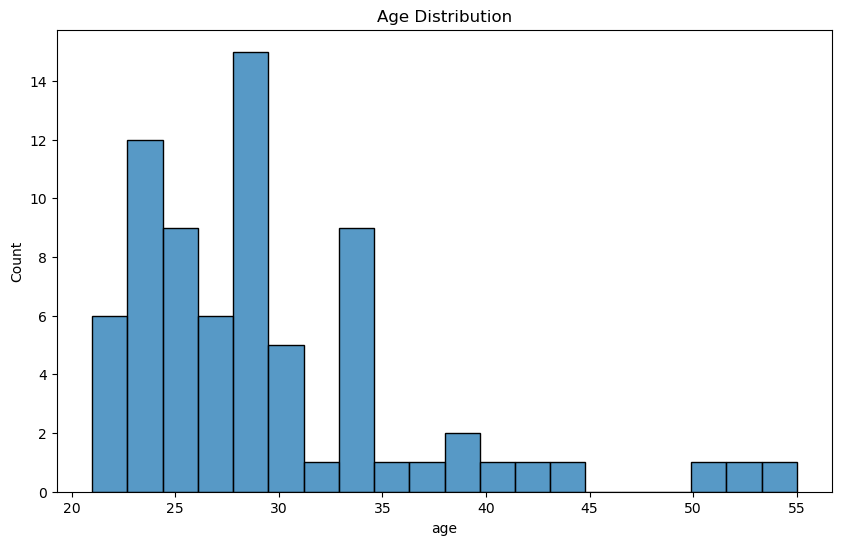


Gender Distribution:
gender
Male      64.383562
Female    34.246575
Other      1.369863
Name: proportion, dtype: float64

Musical Knowledge Distribution:
musical_knowledge
No musical training                                                  31.506849
Professional (music degree or professional experience)               21.917808
Basic (some informal experience or less than 2 years of training)    20.547945
Advanced (more than 5 years of formal training)                      15.068493
Intermediate (2-5 years of formal training)                          10.958904
Name: proportion, dtype: float64

Field Distribution:
field
Engineering or Computer Science    49.295775
Visual Arts, Music, or Design      30.985915
Economics or Business               7.042254
Literature, Theater, or Media       4.225352
Other                               4.225352
Law or Political Science            2.816901
Mathematics or Natural Sciences     1.408451
Name: proportion, dtype: float64


In [12]:
analyze_demographics(df)

# Story Response Question

In [13]:
def analyze_story_response(df):
    print("\n=== Story Response Analysis ===")
    
    story_response = df['srq'].value_counts(normalize=True) * 100
    print("\nOverall story response rate:")
    print(story_response)
    
    # Chi-square test for story response vs musical knowledge
    contingency = pd.crosstab(df['musical_knowledge'], df['srq'])
    chi2, p_value, dof, expected = chi2_contingency(contingency)
    
    print("\nChi-square test results for musical knowledge vs story response:")
    print(f"Chi-square statistic: {chi2:.2f}")
    print(f"p-value: {p_value:.4f}")

    contingency = pd.crosstab(df['age'], df['srq'])
    chi2, p_value, dof, expected = chi2_contingency(contingency)
    
    print("\nChi-square test results for age vs story response:")
    print(f"Chi-square statistic: {chi2:.2f}")
    print(f"p-value: {p_value:.4f}")

    contingency = pd.crosstab(df['field'], df['srq'])
    chi2, p_value, dof, expected = chi2_contingency(contingency)
    
    print("\nChi-square test results for field of work vs story response:")
    print(f"Chi-square statistic: {chi2:.2f}")
    print(f"p-value: {p_value:.4f}")

In [14]:
analyze_story_response(df)


=== Story Response Analysis ===

Overall story response rate:
srq
No     54.794521
Yes    45.205479
Name: proportion, dtype: float64

Chi-square test results for musical knowledge vs story response:
Chi-square statistic: 4.10
p-value: 0.3927

Chi-square test results for age vs story response:
Chi-square statistic: 17.86
p-value: 0.7650

Chi-square test results for field of work vs story response:
Chi-square statistic: 1.51
p-value: 0.9591


# Narrative Engagement, Familarity & Enjoyability and Narrative Alignment 

In [15]:
def analyze_likert_scales(df):
    print("\n=== Likert Scale Analysis ===")
    
    def cronbach_alpha(items):
        items = np.array(items)
        n = items.shape[1]
        var_sum = np.sum(items.var(axis=0, ddof=1))
        total_var = np.var(items.sum(axis=1), ddof=1)
        return (n / (n-1)) * (1 - var_sum/total_var)
    
    categories = {
        'Narrative Engagement': narrative_engagement_cols,
        'Familiarity & Enjoyability': familiarity_enjoyability_cols,
        'Narrative Alignment': narrative_alignment_cols
    }
    
    for category_name, cols in categories.items():
        print(f"\n{category_name}:")
        
        alpha = cronbach_alpha(df[cols])
        print(f"Cronbach's alpha: {alpha:.3f}")
        
        df[f'{category_name}_score'] = df[cols].median(axis=1)
        
        print("\nComposite Score Statistics:")

        stats = df[f'{category_name}_score'].agg(['count', 'median', 'min', 'max'])
        q1 = df[f'{category_name}_score'].quantile(0.25)
        q3 = df[f'{category_name}_score'].quantile(0.75)
        iqr = q3 - q1
        print(stats)
        print(f"IQR: {iqr}")
        
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x='survey', y=f'{category_name}_score')
        plt.title(f'{category_name} Scores by Survey')
        plt.show()
        
        h_stat, p_val = kruskal(*[group[f'{category_name}_score'].values 
                                 for name, group in df.groupby('survey')])
        print(f"\nKruskal-Wallis test results:")
        print(f"H-statistic: {h_stat:.2f}")
        print(f"p-value: {p_val:.4f}")


=== Likert Scale Analysis ===

Narrative Engagement:
Cronbach's alpha: 0.871

Composite Score Statistics:
count     73.0
median     2.5
min        1.0
max        6.0
Name: Narrative Engagement_score, dtype: float64
IQR: 2.0


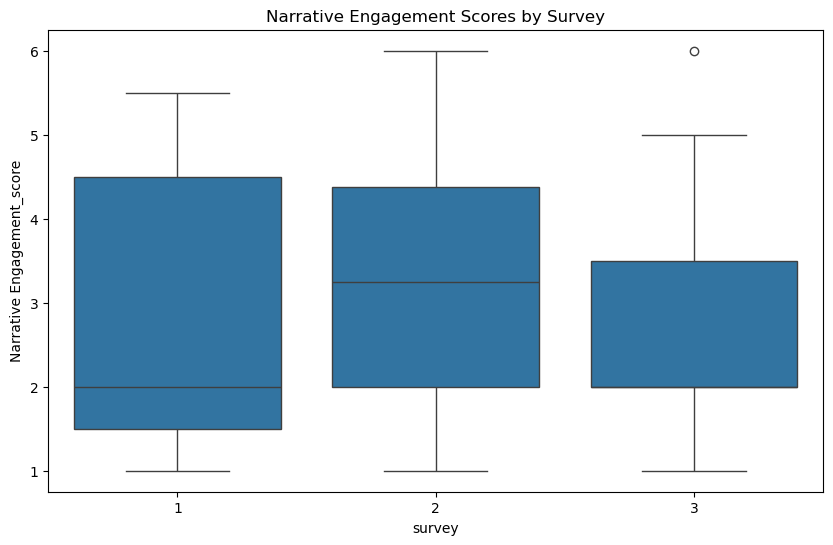


Kruskal-Wallis test results:
H-statistic: 0.84
p-value: 0.6586

Familiarity & Enjoyability:
Cronbach's alpha: 0.515

Composite Score Statistics:
count     73.0
median     4.0
min        1.0
max        6.0
Name: Familiarity & Enjoyability_score, dtype: float64
IQR: 1.5


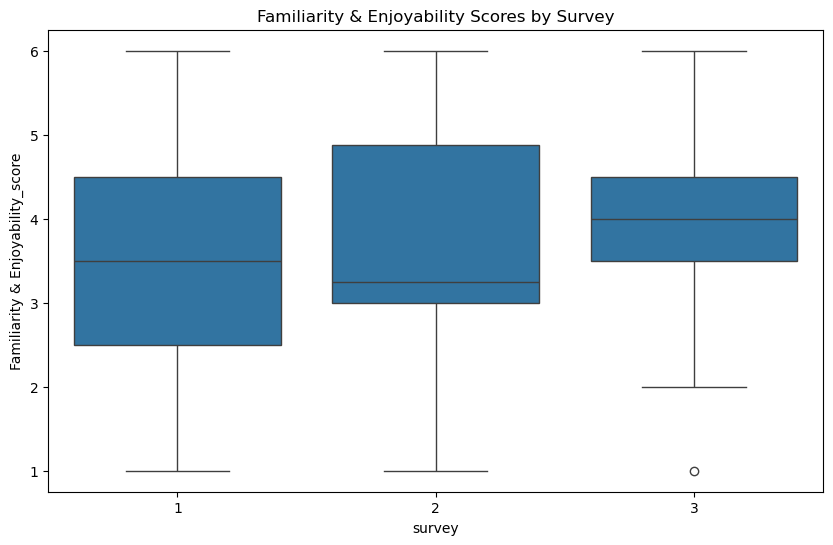


Kruskal-Wallis test results:
H-statistic: 0.94
p-value: 0.6264

Narrative Alignment:
Cronbach's alpha: 0.894

Composite Score Statistics:
count     73.0
median     4.0
min        1.0
max        6.0
Name: Narrative Alignment_score, dtype: float64
IQR: 1.5


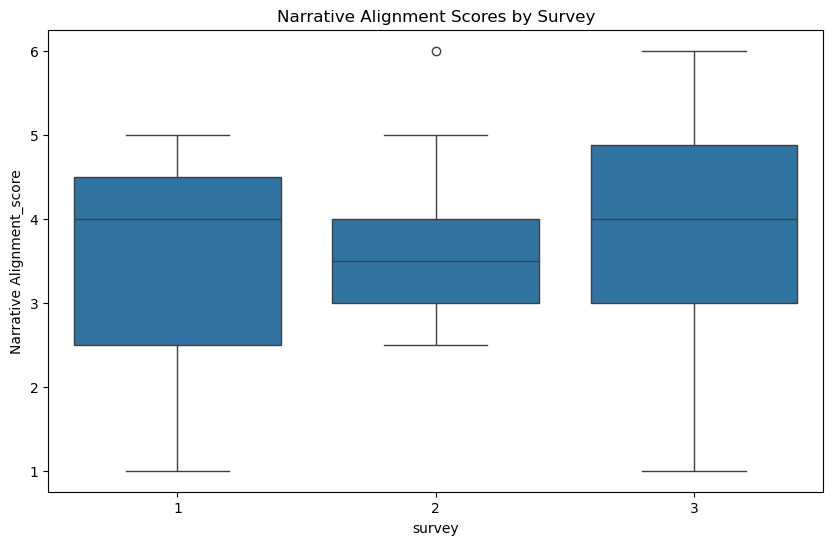


Kruskal-Wallis test results:
H-statistic: 0.81
p-value: 0.6667


In [16]:
analyze_likert_scales(df)

In [17]:
def analyze_likert_scales(df):
    print("\n=== Likert Scale Analysis ===")
    
    def cronbach_alpha(items):
        items = np.array(items)
        n = items.shape[1]
        var_sum = np.sum(items.var(axis=0, ddof=1))
        total_var = np.var(items.sum(axis=1), ddof=1)
        return (n / (n-1)) * (1 - var_sum/total_var)
    
    categories = {
        'Narrative Engagement': narrative_engagement_cols,
        'Familiarity & Enjoyability': familiarity_enjoyability_cols,
        'Narrative Alignment': narrative_alignment_cols
    }
    
    for category_name, cols in categories.items():
        print(f"\n{category_name}:")
        
        alpha = cronbach_alpha(df[cols])
        print(f"Cronbach's alpha: {alpha:.3f}")
        
        df[f'{category_name}_score'] = df[cols].median(axis=1)
        
        print("\nComposite Score Statistics:")

        stats = df[f'{category_name}_score'].agg(['count', 'median', 'min', 'max'])
        q1 = df[f'{category_name}_score'].quantile(0.25)
        q3 = df[f'{category_name}_score'].quantile(0.75)
        iqr = q3 - q1
        print(stats)
        print(f"IQR: {iqr}")
        
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df, x='survey', y=f'{category_name}_score')
        plt.title(f'{category_name} Scores by Survey')
        plt.show()
        
        h_stat, p_val = kruskal(*[group[f'{category_name}_score'].values 
                                 for name, group in df.groupby('survey')])
        print(f"\nKruskal-Wallis test results:")
        print(f"H-statistic: {h_stat:.2f}")
        print(f"p-value: {p_val:.4f}")

### Conclusions:
### - Can take the composite for Narrative Engagement and Narrative Alignment
### - Can't take the composite for Familiarity and Enjoyability

In [18]:
df.drop(columns=['Familiarity & Enjoyability_score'], inplace=True)

In [19]:
df.rename(columns={'fe_1': 'familiarity_score', 'fe_2': 'enjoyability_score'}, inplace=True)

count     73.0
median     4.0
min        1.0
max        6.0
Name: familiarity_score, dtype: float64
IQR: 2.0


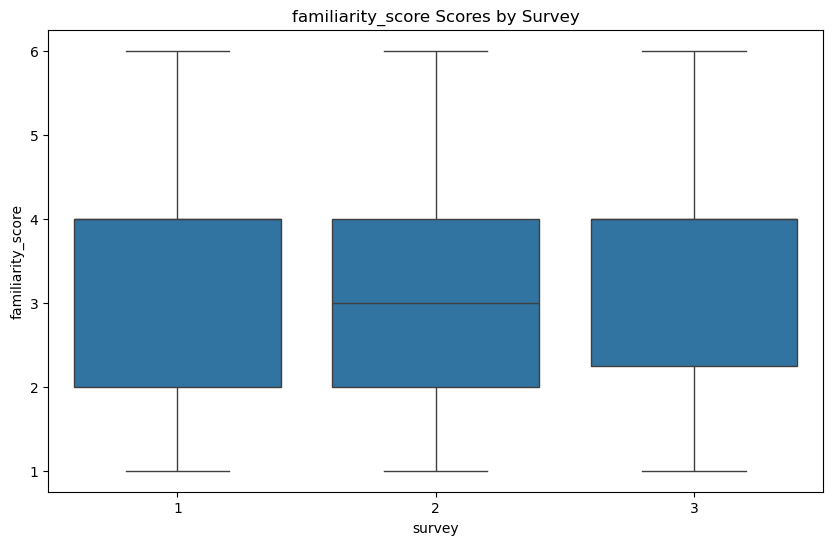

count     73.0
median     4.0
min        1.0
max        6.0
Name: enjoyability_score, dtype: float64
IQR: 2.0


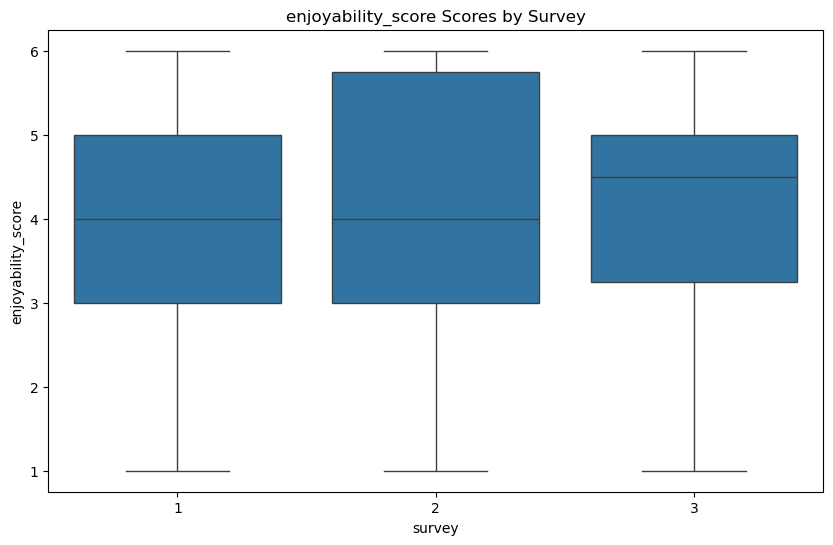

In [20]:
stats = df['familiarity_score'].agg(['count', 'median', 'min', 'max'])
q1 = df['familiarity_score'].quantile(0.25)
q3 = df['familiarity_score'].quantile(0.75)
iqr = q3 - q1
print(stats)
print(f"IQR: {iqr}")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='survey', y='familiarity_score')
plt.title('familiarity_score Scores by Survey')
plt.show()

stats = df['enjoyability_score'].agg(['count', 'median', 'min', 'max'])
q1 = df['enjoyability_score'].quantile(0.25)
q3 = df['enjoyability_score'].quantile(0.75)
iqr = q3 - q1
print(stats)
print(f"IQR: {iqr}")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='survey', y='enjoyability_score')
plt.title('enjoyability_score Scores by Survey')
plt.show()

# Correlations

In [21]:
def analyze_correlations(df):
    print("\n=== Correlation Analysis ===")
    
    correlation_cols = [col for col in df.columns if 'score' in col]
    correlation_matrix = df[correlation_cols].corr(method='spearman')
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation between Category Scores')
    plt.show()
    
    for i in range(len(correlation_cols)):
        for j in range(i+1, len(correlation_cols)):
            correlation = pg.corr(df[correlation_cols[i]], 
                                df[correlation_cols[j]], 
                                method='spearman')
            print(f"\nCorrelation between {correlation_cols[i]} and {correlation_cols[j]}:")
            print(f"rho: {correlation['r'].values[0]:.3f}")
            print(f"p-value: {correlation['p-val'].values[0]:.4f}")




=== Correlation Analysis ===


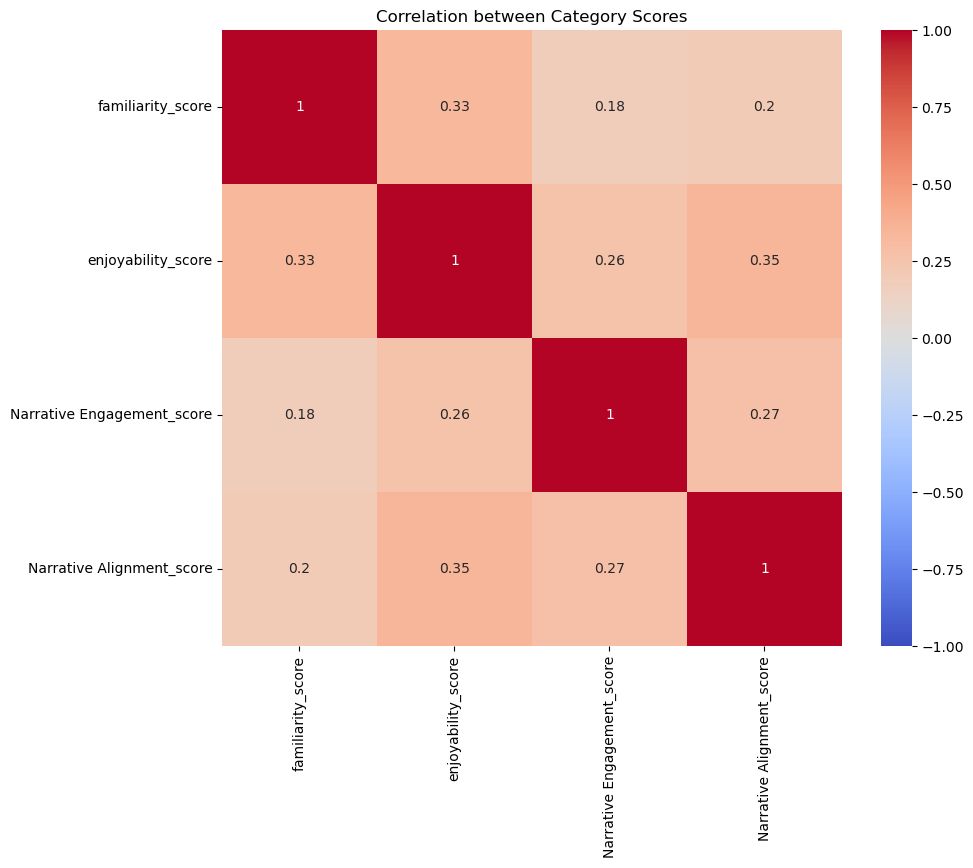


Correlation between familiarity_score and enjoyability_score:
rho: 0.334
p-value: 0.0038

Correlation between familiarity_score and Narrative Engagement_score:
rho: 0.178
p-value: 0.1323

Correlation between familiarity_score and Narrative Alignment_score:
rho: 0.199
p-value: 0.0919

Correlation between enjoyability_score and Narrative Engagement_score:
rho: 0.259
p-value: 0.0271

Correlation between enjoyability_score and Narrative Alignment_score:
rho: 0.350
p-value: 0.0024

Correlation between Narrative Engagement_score and Narrative Alignment_score:
rho: 0.275
p-value: 0.0187


In [22]:
analyze_correlations(df)

# NE, F, E, NA and Musical Knowledge, Field of Study

In [23]:
def analyze_scores_by_musical_knowledge(df):
    categories = [
        'Narrative Engagement_score',
        'familiarity_score',
        'enjoyability_score',
        'Narrative Alignment_score'
    ]

    for col in categories:
        stats_by_knowledge = df.groupby('musical_knowledge')[col].describe()
        print("\nDescriptive statistics by musical knowledge level:")
        print(stats_by_knowledge)
        
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df, x='musical_knowledge', y=col)
        plt.xticks(rotation=45)
        plt.title(col.split('_')[0]+' Scores by Musical Knowledge Level')
        plt.tight_layout()
        plt.show()
        
        groups = [group[col].values 
                for name, group in df.groupby('musical_knowledge')]
        h_stat, p_val = kruskal(*groups)
        
        print("\nKruskal-Wallis test results:")
        print(f"H-statistic: {h_stat:.2f}")
        print(f"p-value: {p_val:.4f}")
        
        if p_val < 0.05:
            print("\nPost-hoc analysis (Mann-Whitney U tests with Bonferroni correction):")
            knowledge_levels = df['musical_knowledge'].unique()
            for i in range(len(knowledge_levels)):
                for j in range(i+1, len(knowledge_levels)):
                    level1 = knowledge_levels[i]
                    level2 = knowledge_levels[j]
                    stat, p = stats.mannwhitneyu(
                        df[df['musical_knowledge'] == level1][col],
                        df[df['musical_knowledge'] == level2][col]
                    )
                    print(f"{level1} vs {level2}:")
                    print(f"p-value: {p*len(knowledge_levels):.4f} (Bonferroni corrected)")



Descriptive statistics by musical knowledge level:
                                                    count      mean       std  \
musical_knowledge                                                               
Advanced (more than 5 years of formal training)      11.0  2.500000  1.732051   
Basic (some informal experience or less than 2 ...   15.0  2.300000  1.386156   
Intermediate (2-5 years of formal training)           8.0  2.625000  1.157275   
No musical training                                  23.0  2.978261  1.577385   
Professional (music degree or professional expe...   16.0  3.562500  1.388944   

                                                    min   25%   50%   75%  max  
musical_knowledge                                                               
Advanced (more than 5 years of formal training)     1.0  1.00  2.00  3.50  6.0  
Basic (some informal experience or less than 2 ...  1.0  1.00  2.00  3.00  5.5  
Intermediate (2-5 years of formal training)         1.0 

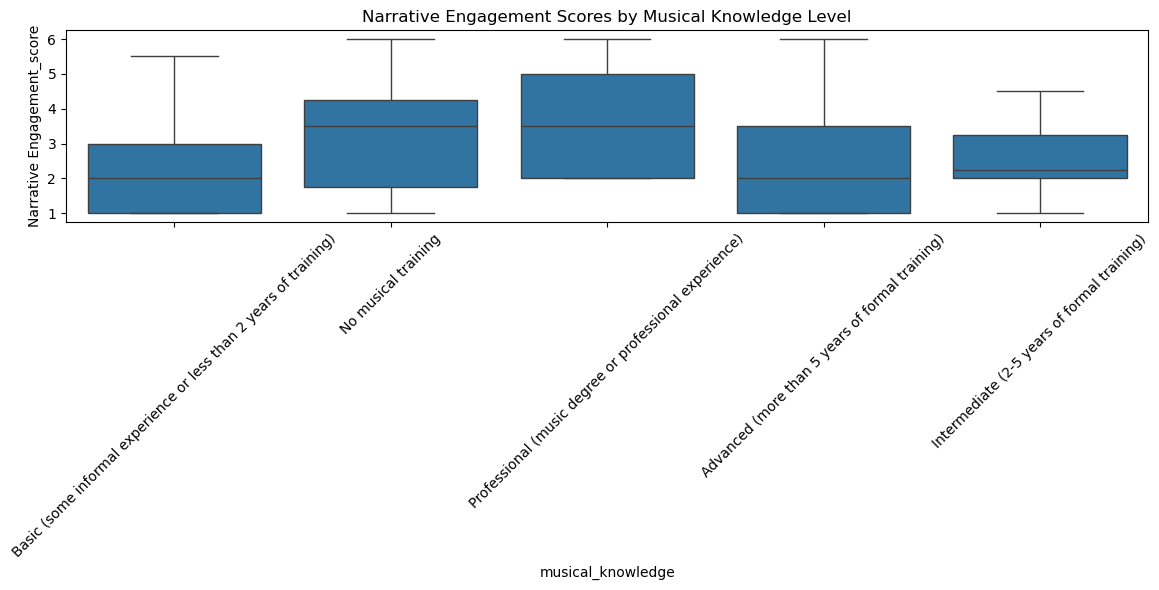


Kruskal-Wallis test results:
H-statistic: 6.72
p-value: 0.1515

Descriptive statistics by musical knowledge level:
                                                    count      mean       std  \
musical_knowledge                                                               
Advanced (more than 5 years of formal training)      11.0  3.000000  1.341641   
Basic (some informal experience or less than 2 ...   15.0  3.466667  1.060099   
Intermediate (2-5 years of formal training)           8.0  3.500000  1.309307   
No musical training                                  23.0  3.434783  1.502304   
Professional (music degree or professional expe...   16.0  3.375000  1.408309   

                                                    min   25%  50%  75%  max  
musical_knowledge                                                             
Advanced (more than 5 years of formal training)     1.0  2.00  3.0  4.0  5.0  
Basic (some informal experience or less than 2 ...  1.0  3.00  4.0  4.0  5.0  


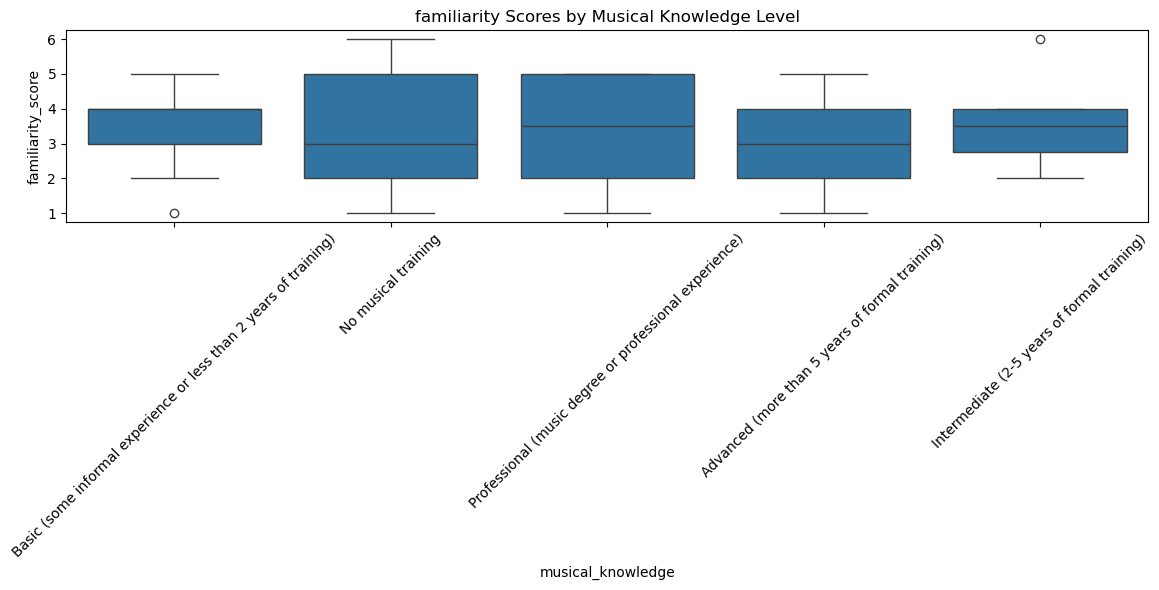


Kruskal-Wallis test results:
H-statistic: 0.87
p-value: 0.9285

Descriptive statistics by musical knowledge level:
                                                    count      mean       std  \
musical_knowledge                                                               
Advanced (more than 5 years of formal training)      11.0  3.636364  1.689540   
Basic (some informal experience or less than 2 ...   15.0  3.933333  1.830951   
Intermediate (2-5 years of formal training)           8.0  4.000000  1.511858   
No musical training                                  23.0  4.565217  1.502304   
Professional (music degree or professional expe...   16.0  3.750000  1.290994   

                                                    min  25%  50%   75%  max  
musical_knowledge                                                             
Advanced (more than 5 years of formal training)     1.0  2.5  4.0  5.00  6.0  
Basic (some informal experience or less than 2 ...  1.0  3.0  4.0  5.50  6.0  


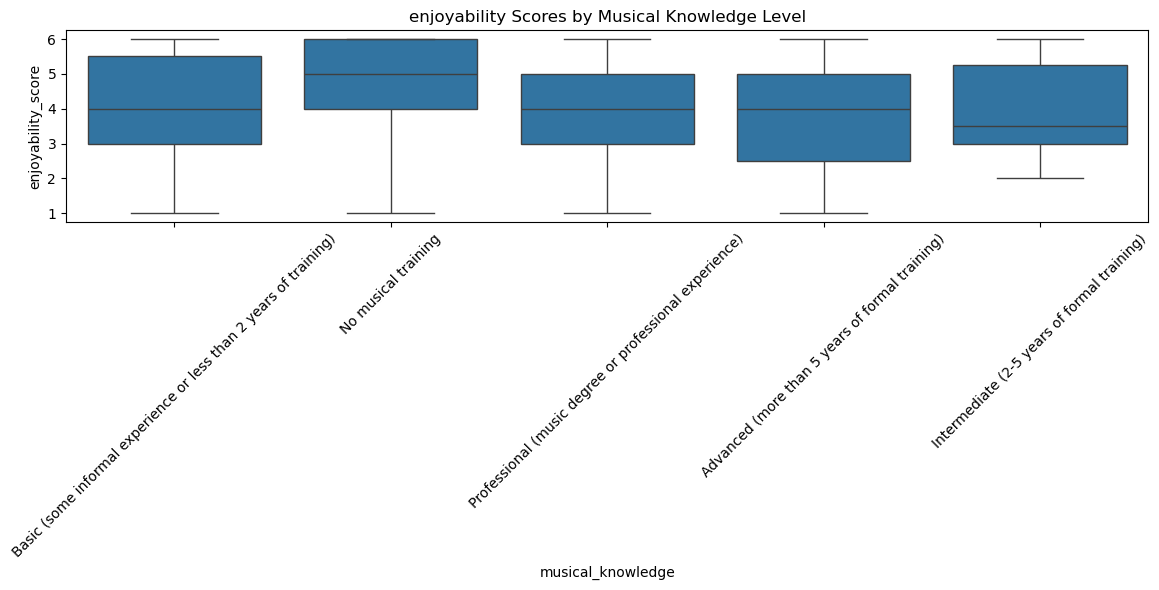


Kruskal-Wallis test results:
H-statistic: 4.55
p-value: 0.3367

Descriptive statistics by musical knowledge level:
                                                    count      mean       std  \
musical_knowledge                                                               
Advanced (more than 5 years of formal training)      11.0  3.272727  1.033529   
Basic (some informal experience or less than 2 ...   15.0  3.500000  1.253566   
Intermediate (2-5 years of formal training)           8.0  3.750000  1.309307   
No musical training                                  23.0  4.065217  1.199473   
Professional (music degree or professional expe...   16.0  3.343750  1.060169   

                                                    min    25%   50%    75%  \
musical_knowledge                                                             
Advanced (more than 5 years of formal training)     1.0  3.000  3.00  4.000   
Basic (some informal experience or less than 2 ...  1.0  3.000  3.50  4.250   


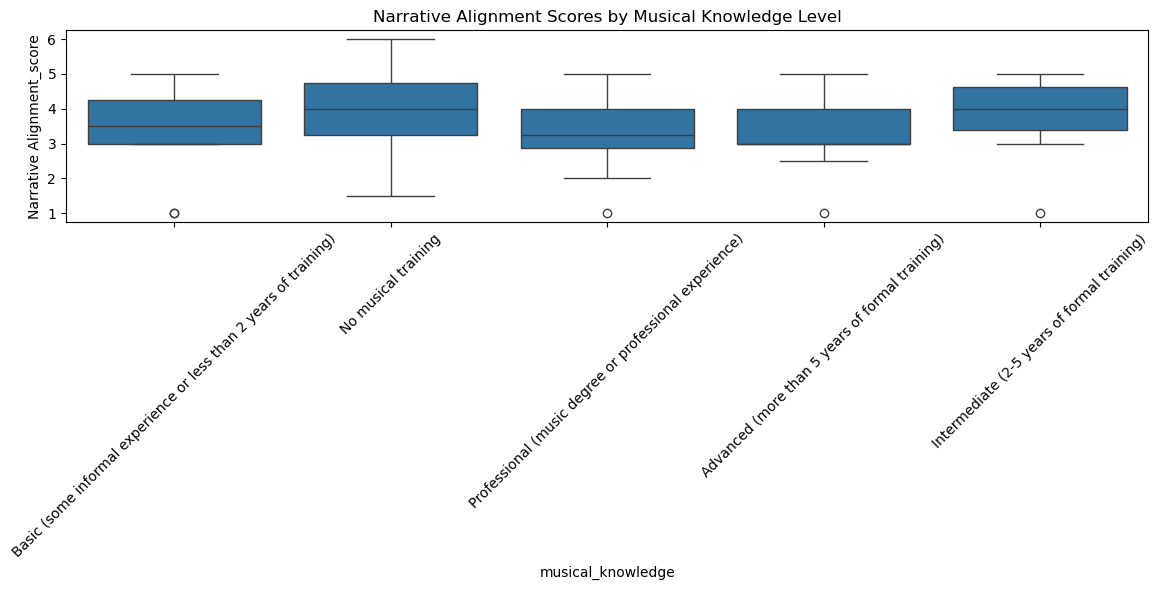


Kruskal-Wallis test results:
H-statistic: 5.96
p-value: 0.2020


In [24]:
analyze_scores_by_musical_knowledge(df)

In [25]:
def analyze_scores_by_field(df):
    categories = [
        'Narrative Engagement_score',
        'familiarity_score',
        'enjoyability_score',
        'Narrative Alignment_score'
    ]

    for col in categories:
        stats_by_knowledge = df.groupby('field')[col].describe()
        print("\nDescriptive statistics by musical knowledge level:")
        print(stats_by_knowledge)
        
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df, x='field', y=col)
        plt.xticks(rotation=45)
        plt.title(col.split('_')[0]+' Scores by Musical Knowledge Level')
        plt.tight_layout()
        plt.show()
        
        groups = [group[col].values 
                for name, group in df.groupby('field')]
        h_stat, p_val = kruskal(*groups)
        
        print("\nKruskal-Wallis test results:")
        print(f"H-statistic: {h_stat:.2f}")
        print(f"p-value: {p_val:.4f}")
        
        if p_val < 0.05:
            print("\nPost-hoc analysis (Mann-Whitney U tests with Bonferroni correction):")
            knowledge_levels = df['field'].unique()
            for i in range(len(knowledge_levels)):
                for j in range(i+1, len(knowledge_levels)):
                    level1 = knowledge_levels[i]
                    level2 = knowledge_levels[j]
                    stat, p = stats.mannwhitneyu(
                        df[df['field'] == level1][col],
                        df[df['field'] == level2][col]
                    )
                    print(f"{level1} vs {level2}:")
                    print(f"p-value: {p*len(knowledge_levels):.4f} (Bonferroni corrected)")


Descriptive statistics by musical knowledge level:
                                 count      mean       std  min    25%  50%  \
field                                                                         
Economics or Business              5.0  2.900000  2.247221  1.0  1.000  2.0   
Engineering or Computer Science   35.0  2.885714  1.323352  1.0  2.000  2.5   
Law or Political Science           2.0  2.500000  2.121320  1.0  1.750  2.5   
Literature, Theater, or Media      3.0  2.166667  0.288675  2.0  2.000  2.0   
Mathematics or Natural Sciences    1.0  3.500000       NaN  3.5  3.500  3.5   
Other                              3.0  3.000000  2.000000  1.0  2.000  3.0   
Visual Arts, Music, or Design     22.0  2.795455  1.722810  1.0  1.125  2.0   

                                   75%  max  
field                                        
Economics or Business            4.500  6.0  
Engineering or Computer Science  4.000  6.0  
Law or Political Science         3.250  4.0  
Litera

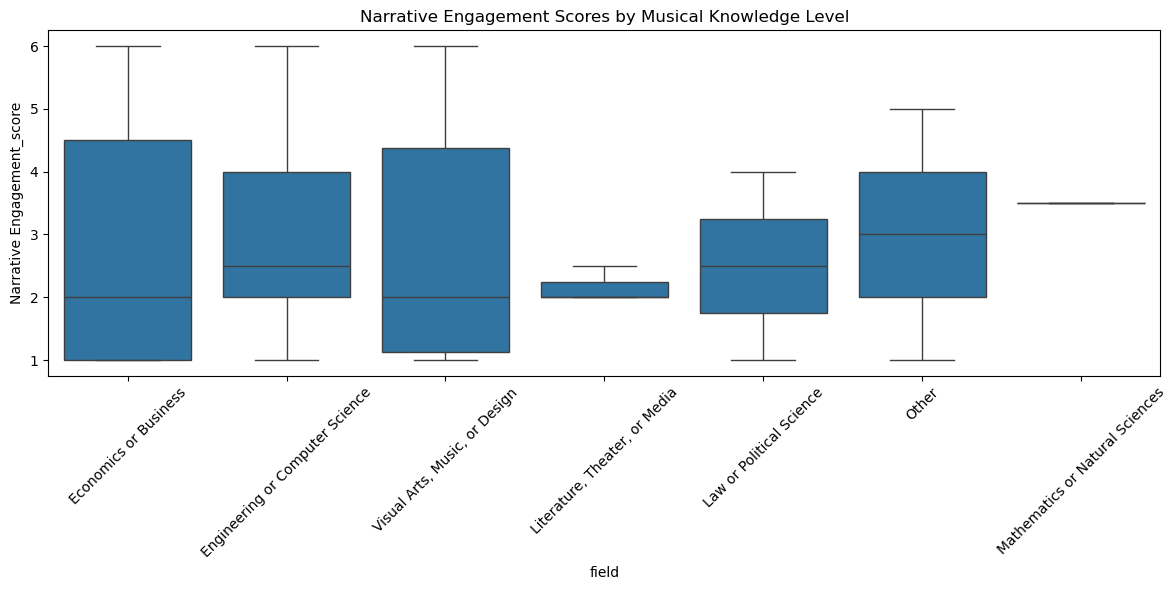


Kruskal-Wallis test results:
H-statistic: 0.98
p-value: 0.9862

Descriptive statistics by musical knowledge level:
                                 count      mean       std  min  25%  50%  \
field                                                                       
Economics or Business              5.0  2.600000  1.140175  1.0  2.0  3.0   
Engineering or Computer Science   35.0  3.257143  1.462127  1.0  2.0  3.0   
Law or Political Science           2.0  3.000000  1.414214  2.0  2.5  3.0   
Literature, Theater, or Media      3.0  3.666667  0.577350  3.0  3.5  4.0   
Mathematics or Natural Sciences    1.0  5.000000       NaN  5.0  5.0  5.0   
Other                              3.0  4.666667  0.577350  4.0  4.5  5.0   
Visual Arts, Music, or Design     22.0  3.454545  1.184313  1.0  3.0  3.5   

                                 75%  max  
field                                      
Economics or Business            3.0  4.0  
Engineering or Computer Science  4.0  6.0  
Law or Politic

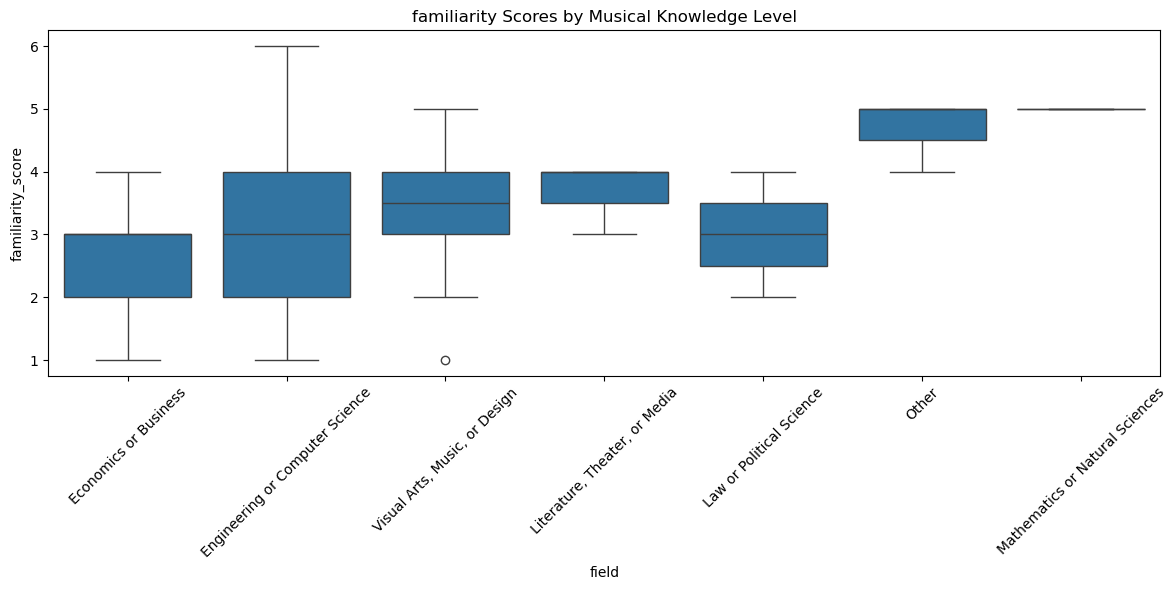


Kruskal-Wallis test results:
H-statistic: 7.71
p-value: 0.2605

Descriptive statistics by musical knowledge level:
                                 count      mean       std  min  25%  50%  \
field                                                                       
Economics or Business              5.0  4.400000  1.516575  2.0  4.0  5.0   
Engineering or Computer Science   35.0  4.000000  1.552986  1.0  3.0  4.0   
Law or Political Science           2.0  5.000000  1.414214  4.0  4.5  5.0   
Literature, Theater, or Media      3.0  3.333333  2.081666  1.0  2.5  4.0   
Mathematics or Natural Sciences    1.0  5.000000       NaN  5.0  5.0  5.0   
Other                              3.0  5.000000  1.732051  3.0  4.5  6.0   
Visual Arts, Music, or Design     22.0  3.727273  1.548634  1.0  3.0  4.0   

                                 75%  max  
field                                      
Economics or Business            5.0  6.0  
Engineering or Computer Science  5.0  6.0  
Law or Politic

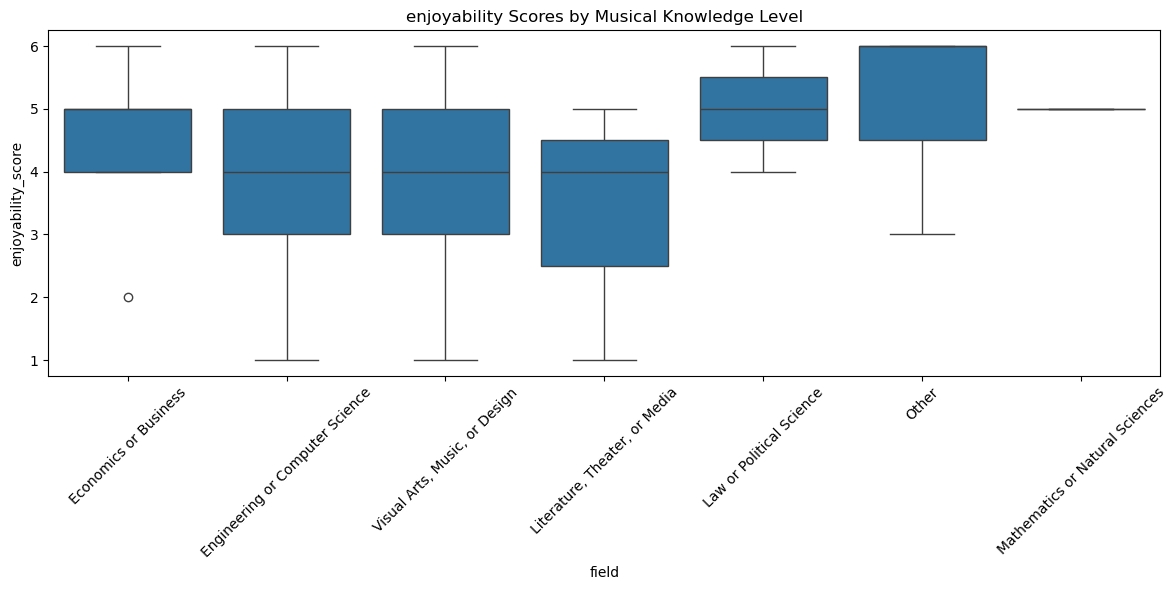


Kruskal-Wallis test results:
H-statistic: 4.04
p-value: 0.6712

Descriptive statistics by musical knowledge level:
                                 count      mean       std  min    25%  50%  \
field                                                                         
Economics or Business              5.0  3.700000  0.670820  3.0  3.000  4.0   
Engineering or Computer Science   35.0  3.385714  1.328897  1.0  2.500  3.0   
Law or Political Science           2.0  3.500000  0.707107  3.0  3.250  3.5   
Literature, Theater, or Media      3.0  4.333333  0.763763  3.5  4.000  4.5   
Mathematics or Natural Sciences    1.0  4.000000       NaN  4.0  4.000  4.0   
Other                              3.0  4.000000  1.000000  3.0  3.500  4.0   
Visual Arts, Music, or Design     22.0  3.750000  1.131266  1.0  3.125  4.0   

                                  75%  max  
field                                       
Economics or Business            4.00  4.5  
Engineering or Computer Science  4.25

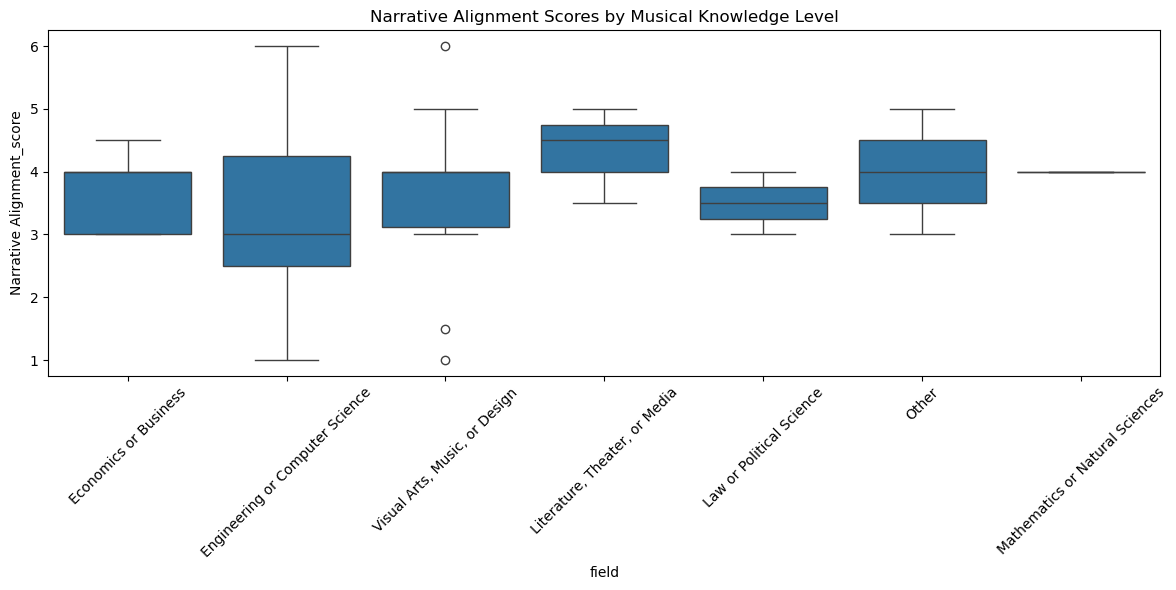


Kruskal-Wallis test results:
H-statistic: 3.70
p-value: 0.7176


In [26]:
analyze_scores_by_field(df)

In [27]:
def analyze_scores_by_age(df):
    categories = [
        'Narrative Engagement_score',
        'familiarity_score',
        'enjoyability_score',
        'Narrative Alignment_score'
    ]

    for col in categories:
        stats_by_knowledge = df.groupby('age')[col].describe()
        print("\nDescriptive statistics by age:")
        print(stats_by_knowledge)
        
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df, x='age', y=col)
        plt.xticks(rotation=45)
        plt.title(col.split('_')[0]+' Scores by Age')
        plt.tight_layout()
        plt.show()
        
        groups = [group[col].values 
                for name, group in df.groupby('age')]
        h_stat, p_val = kruskal(*groups)
        
        print("\nKruskal-Wallis test results:")
        print(f"H-statistic: {h_stat:.2f}")
        print(f"p-value: {p_val:.4f}")
        
        if p_val < 0.05:
            print("\nPost-hoc analysis (Mann-Whitney U tests with Bonferroni correction):")
            knowledge_levels = df['age'].unique()
            for i in range(len(knowledge_levels)):
                for j in range(i+1, len(knowledge_levels)):
                    level1 = knowledge_levels[i]
                    level2 = knowledge_levels[j]
                    stat, p = stats.mannwhitneyu(
                        df[df['age'] == level1][col],
                        df[df['age'] == level2][col]
                    )
                    print(f"{level1} vs {level2}:")
                    print(f"p-value: {p*len(knowledge_levels):.4f} (Bonferroni corrected)")


Descriptive statistics by age:
     count      mean       std  min    25%   50%    75%  max
age                                                         
21     1.0  2.500000       NaN  2.5  2.500  2.50  2.500  2.5
22     5.0  2.400000  1.083974  1.0  2.000  2.00  3.500  3.5
23     5.0  2.700000  1.524795  1.0  1.500  2.50  4.000  4.5
24     7.0  2.785714  1.728611  1.0  1.000  3.50  4.000  5.0
25     3.0  2.833333  1.607275  1.0  2.250  3.50  3.750  4.0
26     6.0  2.750000  1.254990  2.0  2.000  2.00  3.125  5.0
27     6.0  3.166667  1.807392  1.0  2.000  2.75  4.625  5.5
28    11.0  2.772727  1.737292  1.0  1.000  2.50  4.250  5.5
29     4.0  2.625000  1.250000  2.0  2.000  2.00  2.625  4.5
30     4.0  3.875000  1.652019  2.0  3.125  3.75  4.500  6.0
31     1.0  4.500000       NaN  4.5  4.500  4.50  4.500  4.5
32     1.0  1.000000       NaN  1.0  1.000  1.00  1.000  1.0
33     5.0  2.700000  1.095445  2.0  2.000  2.00  3.000  4.5
34     4.0  3.000000  2.449490  1.0  1.000  2.50  4.5

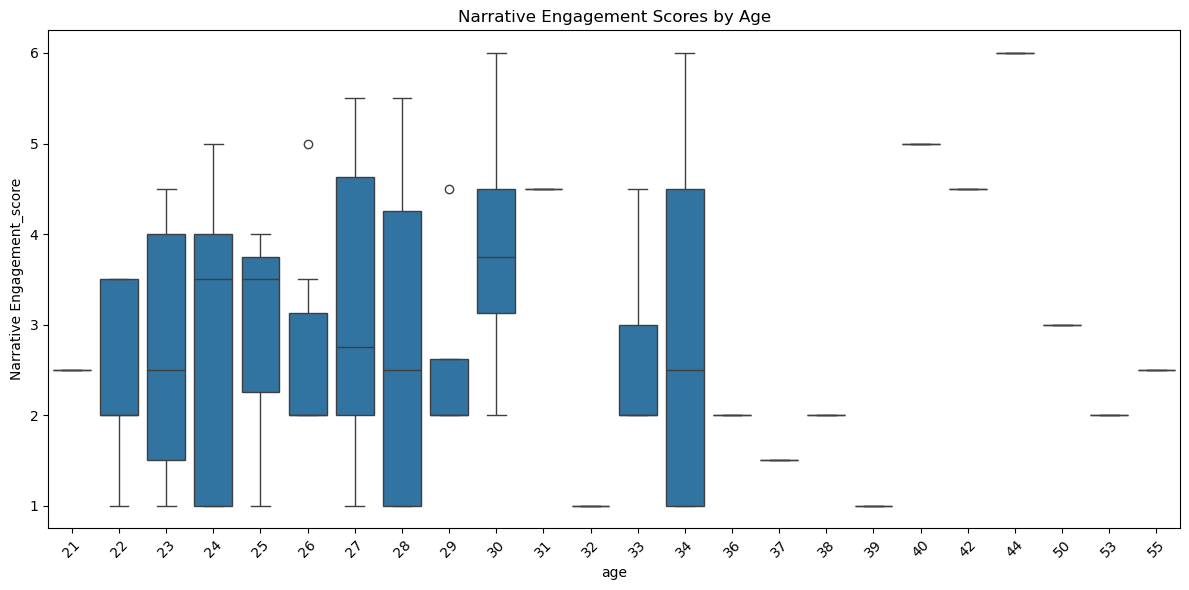


Kruskal-Wallis test results:
H-statistic: 15.15
p-value: 0.8894

Descriptive statistics by age:
     count      mean       std  min   25%  50%   75%  max
age                                                      
21     1.0  1.000000       NaN  1.0  1.00  1.0  1.00  1.0
22     5.0  3.400000  1.816590  1.0  2.00  4.0  5.00  5.0
23     5.0  3.000000  1.000000  2.0  2.00  3.0  4.00  4.0
24     7.0  3.428571  0.786796  2.0  3.00  4.0  4.00  4.0
25     3.0  4.000000  2.000000  2.0  3.00  4.0  5.00  6.0
26     6.0  4.166667  1.471960  2.0  3.25  4.5  5.00  6.0
27     6.0  3.666667  1.211060  2.0  3.00  3.5  4.75  5.0
28    11.0  3.454545  1.293340  1.0  3.00  3.0  4.50  5.0
29     4.0  3.250000  1.500000  2.0  2.00  3.0  4.25  5.0
30     4.0  3.000000  0.816497  2.0  2.75  3.0  3.25  4.0
31     1.0  4.000000       NaN  4.0  4.00  4.0  4.00  4.0
32     1.0  1.000000       NaN  1.0  1.00  1.0  1.00  1.0
33     5.0  3.600000  1.140175  2.0  3.00  4.0  4.00  5.0
34     4.0  2.750000  1.500000  1

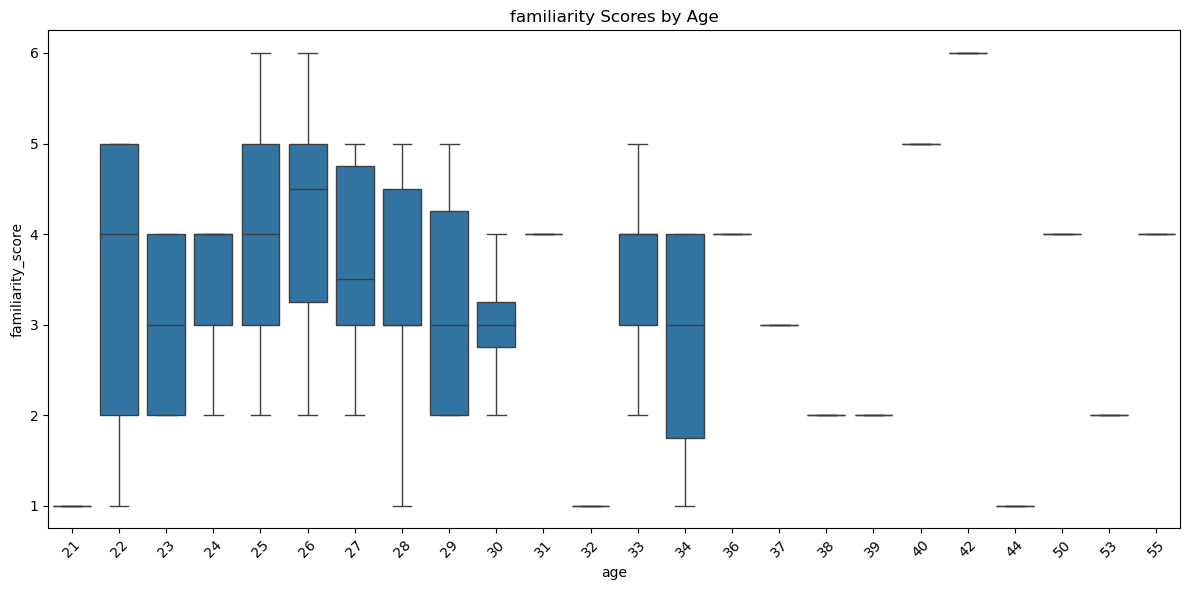


Kruskal-Wallis test results:
H-statistic: 21.78
p-value: 0.5336

Descriptive statistics by age:
     count      mean       std  min   25%  50%   75%  max
age                                                      
21     1.0  5.000000       NaN  5.0  5.00  5.0  5.00  5.0
22     5.0  3.600000  1.949359  1.0  2.00  5.0  5.00  5.0
23     5.0  3.800000  1.923538  1.0  3.00  4.0  5.00  6.0
24     7.0  4.714286  1.799471  1.0  4.50  5.0  6.00  6.0
25     3.0  5.000000  1.000000  4.0  4.50  5.0  5.50  6.0
26     6.0  4.166667  1.940790  1.0  3.25  4.5  5.75  6.0
27     6.0  3.833333  1.169045  3.0  3.00  3.5  4.00  6.0
28    11.0  4.272727  1.348400  2.0  3.50  4.0  5.50  6.0
29     4.0  4.250000  0.957427  3.0  3.75  4.5  5.00  5.0
30     4.0  3.750000  1.258306  2.0  3.50  4.0  4.25  5.0
31     1.0  4.000000       NaN  4.0  4.00  4.0  4.00  4.0
32     1.0  2.000000       NaN  2.0  2.00  2.0  2.00  2.0
33     5.0  4.200000  1.643168  3.0  3.00  3.0  6.00  6.0
34     4.0  3.750000  2.061553  1

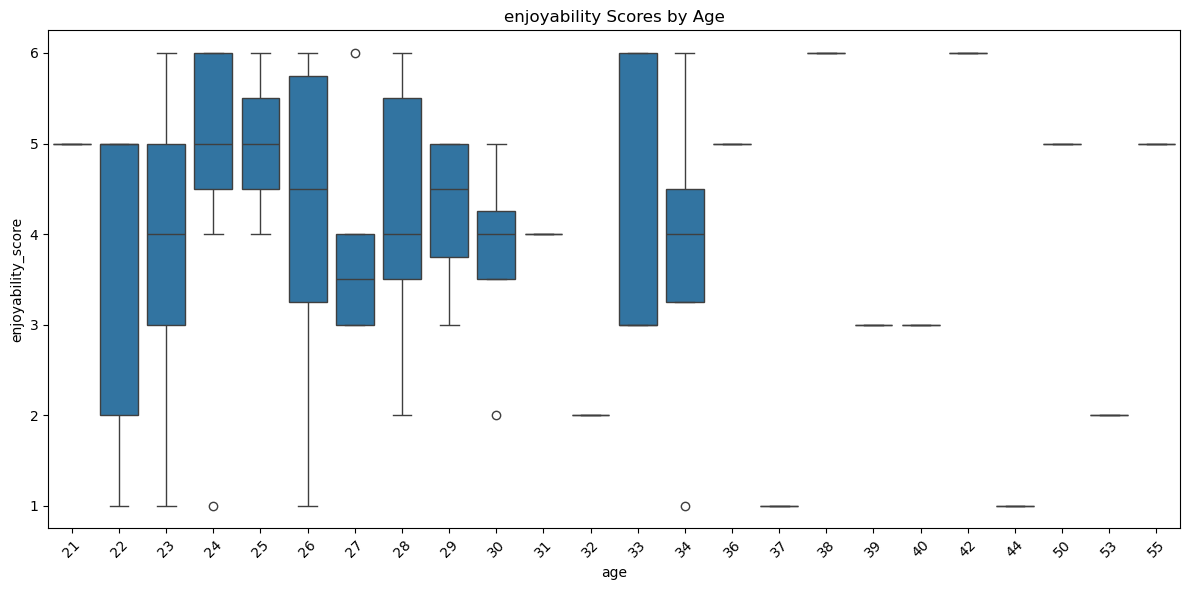


Kruskal-Wallis test results:
H-statistic: 19.27
p-value: 0.6856

Descriptive statistics by age:
     count      mean       std  min    25%   50%    75%  max
age                                                         
21     1.0  3.000000       NaN  3.0  3.000  3.00  3.000  3.0
22     5.0  3.200000  1.440486  1.0  2.500  4.00  4.000  4.5
23     5.0  3.100000  1.244990  1.0  3.000  3.50  4.000  4.0
24     7.0  4.000000  0.866025  3.0  3.250  4.00  4.750  5.0
25     3.0  3.833333  1.892969  2.5  2.750  3.00  4.500  6.0
26     6.0  4.083333  1.685724  1.0  4.000  4.25  4.875  6.0
27     6.0  3.500000  0.547723  3.0  3.000  3.50  4.000  4.0
28    11.0  4.045455  1.213560  1.5  3.500  4.00  5.000  6.0
29     4.0  3.625000  0.478714  3.0  3.375  3.75  4.000  4.0
30     4.0  3.500000  1.224745  2.0  2.750  3.75  4.500  4.5
31     1.0  5.000000       NaN  5.0  5.000  5.00  5.000  5.0
32     1.0  4.500000       NaN  4.5  4.500  4.50  4.500  4.5
33     5.0  3.700000  0.670820  2.5  4.000  4.00 

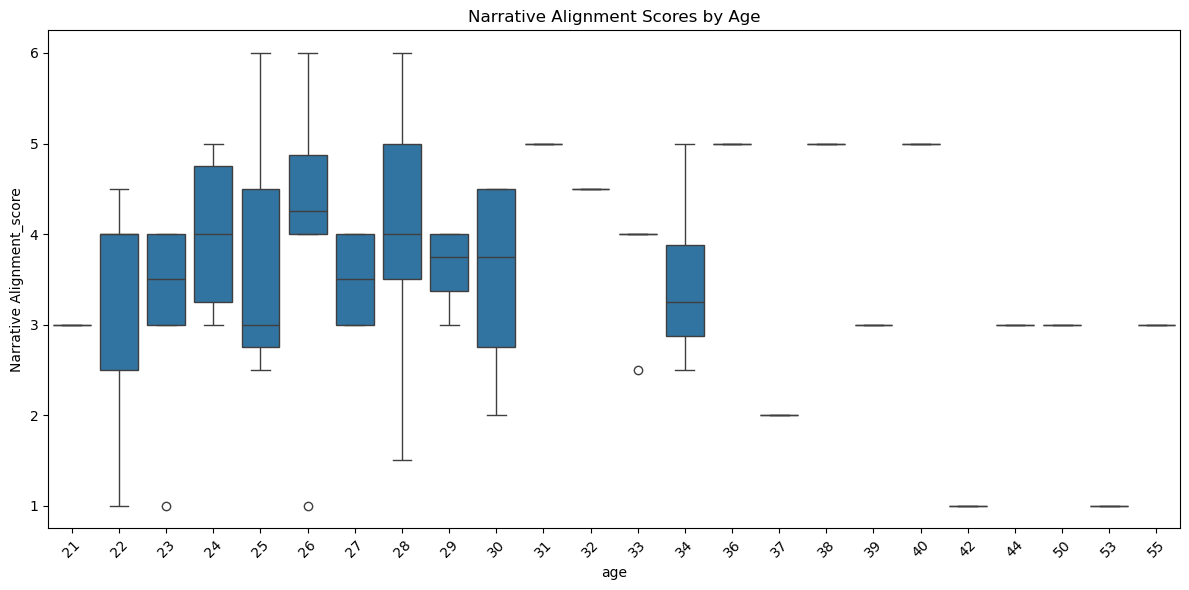


Kruskal-Wallis test results:
H-statistic: 23.85
p-value: 0.4123


In [28]:
analyze_scores_by_age(df)

### Conclusions:
### - Not significant 

# Story Question Response and NE, F, E, NA

In [29]:
def analyze_engagement_by_srq(df):
    print("=== Analysis of Narrative Engagement by Story Response ===\n")
    
    print("Descriptive Statistics:")
    stats_by_srq = df.groupby('srq')['Narrative Engagement_score'].describe()
    print(stats_by_srq)
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='srq', y='Narrative Engagement_score')
    plt.title('Narrative Engagement Scores by Story Response')
    plt.xlabel('Imagined a Story')
    plt.ylabel('Narrative Engagement Score')
    plt.show()
    
    yes_scores = df[df['srq'] == 'Yes']['Narrative Engagement_score']
    no_scores = df[df['srq'] == 'No']['Narrative Engagement_score']
    
    stat, p_value = stats.mannwhitneyu(yes_scores, no_scores, alternative='two-sided')
    
    print("\nMann-Whitney U Test Results:")
    print(f"Statistic: {stat}")
    print(f"p-value: {p_value}")
    
    effect_size = 2 * (stat / (len(yes_scores) * len(no_scores))) - 1
    print(f"\nEffect size (rank-biserial correlation): {effect_size:.3f}")
    
    median_engagement = df['Narrative Engagement_score'].median()
    df['high_engagement'] = df['Narrative Engagement_score'] > median_engagement
    
    contingency_table = pd.crosstab(df['srq'], df['high_engagement'])
    print("\nContingency Table (High/Low Engagement vs Story Response):")
    print(contingency_table)
    
    chi2, chi2_p, dof, expected = chi2_contingency(contingency_table)
    print("\nChi-square Test Results:")
    print(f"Chi-square statistic: {chi2:.3f}")
    print(f"p-value: {chi2_p:.4f}")

=== Analysis of Narrative Engagement by Story Response ===

Descriptive Statistics:
     count      mean       std  min  25%  50%  75%  max
srq                                                    
No    40.0  1.775000  0.775837  1.0  1.0  2.0  2.0  4.0
Yes   33.0  4.166667  1.087332  2.0  3.5  4.0  5.0  6.0


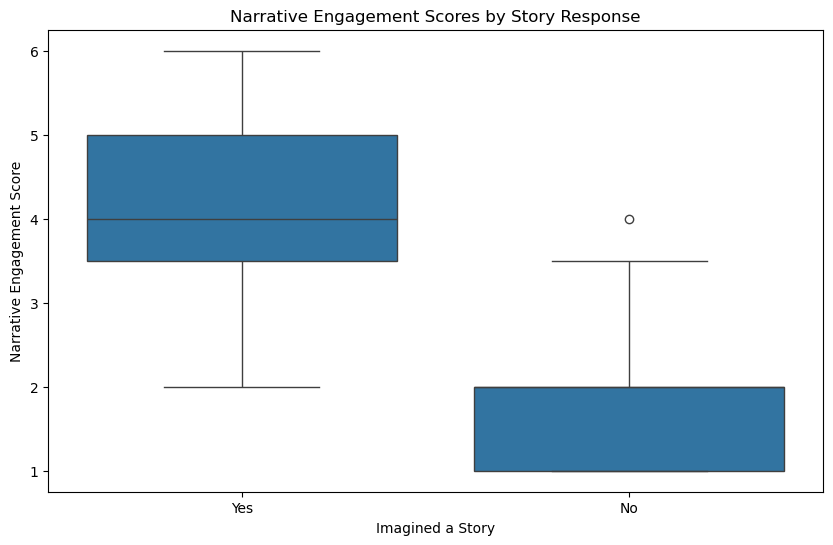

AttributeError: 'Series' object has no attribute 'mannwhitneyu'

In [30]:
analyze_engagement_by_srq(df)

In [31]:
def analyze_f_by_srq(df):
    print("=== Analysis of Familiarity by Story Response ===\n")
    
    print("Descriptive Statistics:")
    stats_by_srq = df.groupby('srq')['familiarity_score'].describe()
    print(stats_by_srq)
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='srq', y='familiarity_score')
    plt.title('Familiarity Scores by Story Response')
    plt.xlabel('Story Response Question')
    plt.ylabel('Familiarity Score')
    plt.show()
    
    yes_scores = df[df['srq'] == 'Yes']['familiarity_score']
    no_scores = df[df['srq'] == 'No']['familiarity_score']
    
    stat, p_value = stats.mannwhitneyu(yes_scores, no_scores, alternative='two-sided')
    
    print("\nMann-Whitney U Test Results:")
    print(f"Statistic: {stat}")
    print(f"p-value: {p_value}")
    
    effect_size = 2 * (stat / (len(yes_scores) * len(no_scores))) - 1
    print(f"\nEffect size (rank-biserial correlation): {effect_size:.3f}")
    
    median_engagement = df['familiarity_score'].median()
    df['high_fe'] = df['familiarity_score'] > median_engagement
    
    contingency_table = pd.crosstab(df['srq'], df['high_fe'])
    print("\nContingency Table (High/Low Familiarity vs Story Response):")
    print(contingency_table)
    
    chi2, chi2_p, dof, expected = chi2_contingency(contingency_table)
    print("\nChi-square Test Results:")
    print(f"Chi-square statistic: {chi2:.3f}")
    print(f"p-value: {chi2_p:.4f}")

=== Analysis of Familiarity by Story Response ===

Descriptive Statistics:
     count      mean       std  min  25%  50%  75%  max
srq                                                    
No    40.0  3.275000  1.320208  1.0  2.0  3.5  4.0  6.0
Yes   33.0  3.484848  1.349102  1.0  2.0  4.0  4.0  6.0


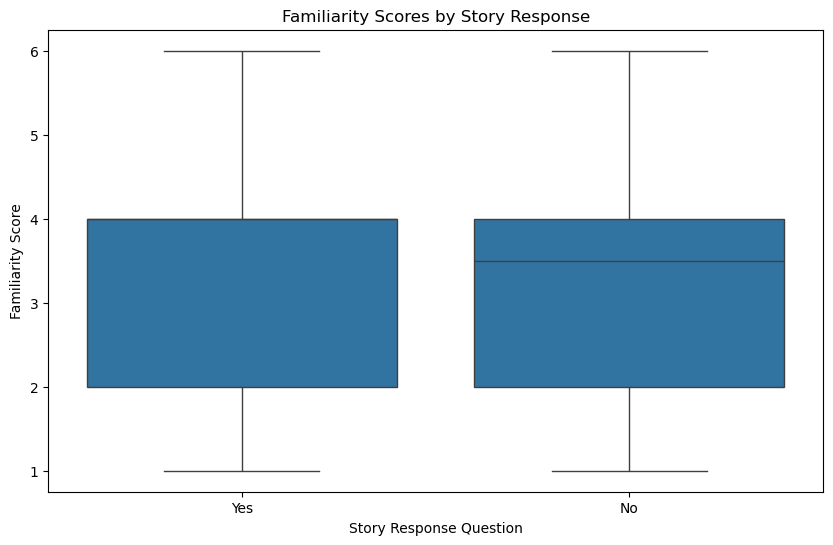

AttributeError: 'Series' object has no attribute 'mannwhitneyu'

In [32]:
analyze_f_by_srq(df)

In [33]:
def analyze_e_by_srq(df):
    print("=== Analysis of Enjoyability by Story Response ===\n")
    
    print("Descriptive Statistics:")
    stats_by_srq = df.groupby('srq')['enjoyability_score'].describe()
    print(stats_by_srq)
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='srq', y='enjoyability_score')
    plt.title('Enjoyability Scores by Story Response')
    plt.xlabel('Story Response Question')
    plt.ylabel('Enjoyability Score')
    plt.show()
    
    yes_scores = df[df['srq'] == 'Yes']['enjoyability_score']
    no_scores = df[df['srq'] == 'No']['enjoyability_score']
    
    stat, p_value = stats.mannwhitneyu(yes_scores, no_scores, alternative='two-sided')
    
    print("\nMann-Whitney U Test Results:")
    print(f"Statistic: {stat}")
    print(f"p-value: {p_value}")
    
    effect_size = 2 * (stat / (len(yes_scores) * len(no_scores))) - 1
    print(f"\nEffect size (rank-biserial correlation): {effect_size:.3f}")
    
    median_engagement = df['enjoyability_score'].median()
    df['high_fe'] = df['enjoyability_score'] > median_engagement
    
    contingency_table = pd.crosstab(df['srq'], df['high_fe'])
    print("\nContingency Table (High/Low Enjoyability vs Story Response):")
    print(contingency_table)
    
    chi2, chi2_p, dof, expected = chi2_contingency(contingency_table)
    print("\nChi-square Test Results:")
    print(f"Chi-square statistic: {chi2:.3f}")
    print(f"p-value: {chi2_p:.4f}")

=== Analysis of Enjoyability by Story Response ===

Descriptive Statistics:
     count      mean       std  min  25%  50%  75%  max
srq                                                    
No    40.0  3.750000  1.660244  1.0  3.0  4.0  5.0  6.0
Yes   33.0  4.424242  1.369998  1.0  4.0  5.0  6.0  6.0


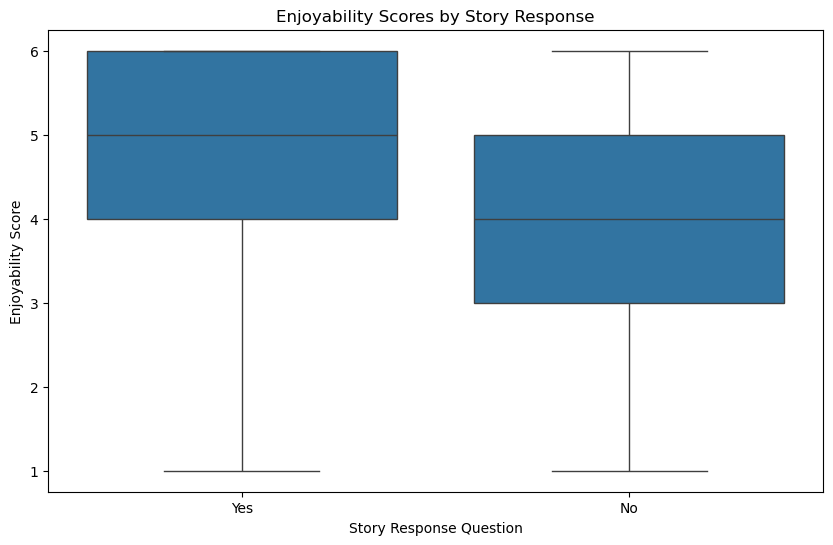

AttributeError: 'Series' object has no attribute 'mannwhitneyu'

In [34]:
analyze_e_by_srq(df)

In [35]:
def analyze_na_by_srq(df):
    print("=== Analysis of Narrative Alignment by Story Response ===\n")
    
    print("Descriptive Statistics:")
    stats_by_srq = df.groupby('srq')['Narrative Alignment_score'].describe()
    print(stats_by_srq)
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='srq', y='Narrative Alignment_score')
    plt.title('Narrative Alignment Scores by Story Response')
    plt.xlabel('Story Response Question')
    plt.ylabel('Narrative Alignment Score')
    plt.show()
    
    yes_scores = df[df['srq'] == 'Yes']['Narrative Alignment_score']
    no_scores = df[df['srq'] == 'No']['Narrative Alignment_score']
    
    stat, p_value = stats.mannwhitneyu(yes_scores, no_scores, alternative='two-sided')
    
    print("\nMann-Whitney U Test Results:")
    print(f"Statistic: {stat}")
    print(f"p-value: {p_value}")
    
    effect_size = 2 * (stat / (len(yes_scores) * len(no_scores))) - 1
    print(f"\nEffect size (rank-biserial correlation): {effect_size:.3f}")
    
    median_engagement = df['Narrative Alignment_score'].median()
    df['high_na'] = df['Narrative Alignment_score'] > median_engagement
    
    contingency_table = pd.crosstab(df['srq'], df['high_na'])
    print("\nContingency Table (High/Low Alignment vs Story Response):")
    print(contingency_table)
    
    chi2, chi2_p, dof, expected = chi2_contingency(contingency_table)
    print("\nChi-square Test Results:")
    print(f"Chi-square statistic: {chi2:.3f}")
    print(f"p-value: {chi2_p:.4f}")

=== Analysis of Narrative Alignment by Story Response ===

Descriptive Statistics:
     count      mean       std  min    25%   50%  75%  max
srq                                                       
No    40.0  3.375000  1.254479  1.0  2.875  3.25  4.0  6.0
Yes   33.0  3.954545  1.018298  1.0  3.500  4.00  4.5  6.0


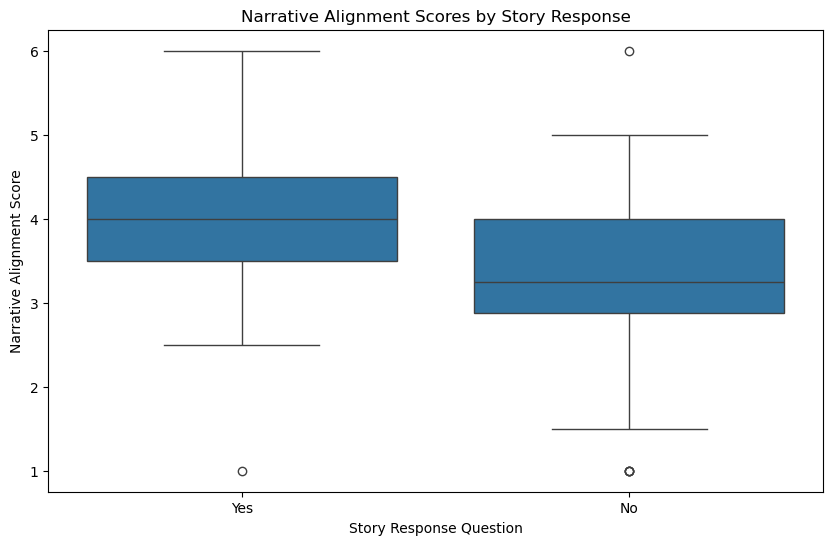

AttributeError: 'Series' object has no attribute 'mannwhitneyu'

In [36]:
analyze_na_by_srq(df)

### Conclusions
### - Statistically significant for Narrative Engagement
### - Not for Familiarity, Enjoyability and Narrative Alignment

# Composite

In [37]:
def create_combined_visualization(df):
    categories = {
        'Narrative\nEngagement': narrative_engagement_cols,
        'Familiarity &\nEnjoyability': familiarity_enjoyability_cols,
        'Narrative\nAlignment': narrative_alignment_cols
    }
    
    plot_data = pd.DataFrame()
    for category_name, cols in categories.items():
        category_scores = df[cols].median(axis=1)
        temp_df = pd.DataFrame({
            'Survey Section': category_name,
            'Score': category_scores
        })
        plot_data = pd.concat([plot_data, temp_df])
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    sns.boxplot(data=plot_data, x='Survey Section', y='Score', ax=ax1)
    ax1.set_title('Distribution of Scores by Survey Section (Box Plot)')
    ax1.set_ylabel('Score (1-6 scale)')
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    sns.violinplot(data=plot_data, x='Survey Section', y='Score', ax=ax2)
    ax2.set_title('Distribution of Scores by Survey Section (Violin Plot)')
    ax2.set_ylabel('Score (1-6 scale)')
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    
    ax1.axhline(y=3.5, color='r', linestyle='--', alpha=0.5)
    ax2.axhline(y=3.5, color='r', linestyle='--', alpha=0.5)
    
    medians = plot_data.groupby('Survey Section')['Score'].median()
    print("\nMedian scores for each category:")
    print(medians)
    
    q1 = plot_data.groupby('Survey Section')['Score'].quantile(0.25)
    q3 = plot_data.groupby('Survey Section')['Score'].quantile(0.75)
    iqr = q3 - q1
    print("\nInterquartile ranges for each category:")
    print(iqr)
    
    plt.show()


In [38]:
create_combined_visualization(df)

KeyError: "None of [Index(['fe_1', 'fe_2'], dtype='object')] are in the [columns]"


Overall Statistics:

Median scores for each section:
Survey Section
Familiarity &\nEnjoyability    4.00
Narrative\nAlignment           3.75
Narrative\nEngagement          2.50
Name: Score, dtype: float64

Statistics by Story Response:
                                            median  count
Survey Section              Story Response               
Familiarity &\nEnjoyability No               3.500     40
                            Yes              4.000     33
Narrative\nAlignment        No               3.375     40
                            Yes              4.000     33
Narrative\nEngagement       No               1.875     40
                            Yes              4.250     33


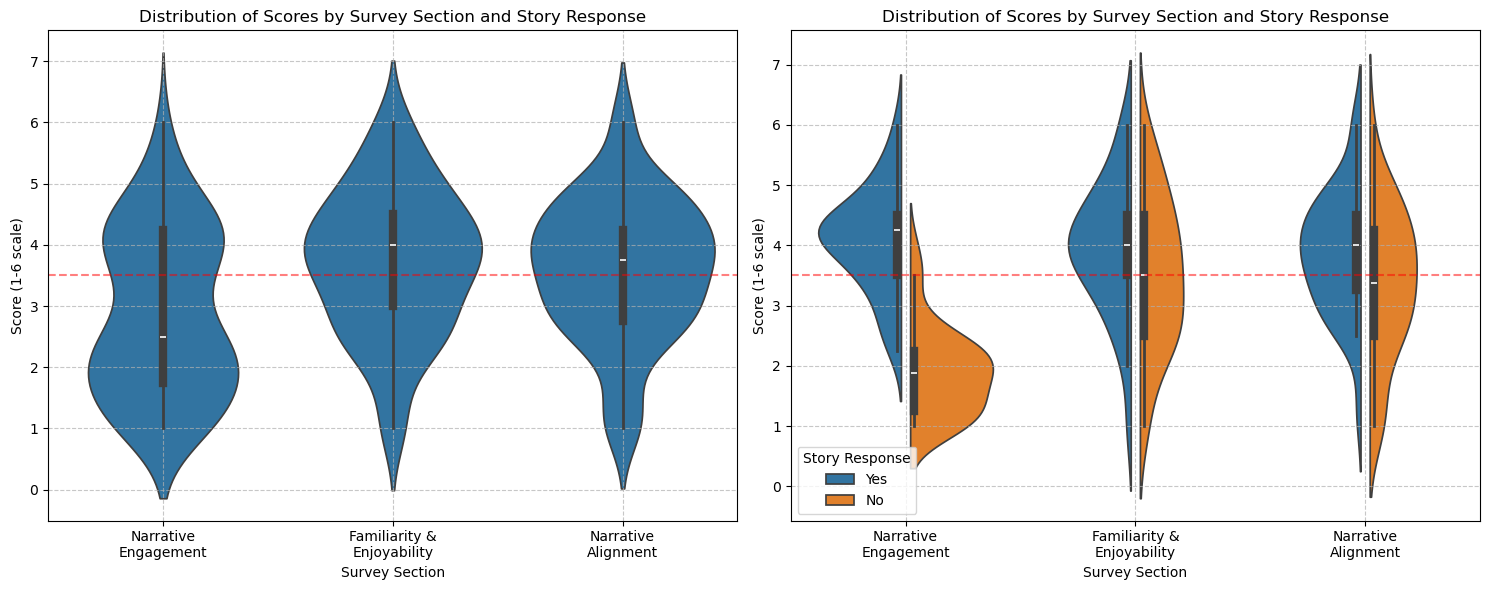

In [ ]:
def create_combined_visualization(df):
    # Prepare data for plotting with SRQ information
    categories = {
        'Narrative\nEngagement': narrative_engagement_cols,
        'Familiarity &\nEnjoyability': familiarity_enjoyability_cols,
        'Narrative\nAlignment': narrative_alignment_cols
    }
    
    plot_data = pd.DataFrame()
    for category_name, cols in categories.items():
        category_scores = df[cols].median(axis=1)
        temp_df = pd.DataFrame({
            'Survey Section': category_name,
            'Score': category_scores,
            'Story Response': df['srq']
        })
        plot_data = pd.concat([plot_data, temp_df])
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # sns.boxplot(data=plot_data, x='Survey Section', y='Score', ax=ax1)
    # ax1.set_title('Distribution of Scores by Survey Section')
    # ax1.set_ylabel('Score (1-6 scale)')
    # ax1.grid(True, linestyle='--', alpha=0.7)
    sns.violinplot(data=plot_data, x='Survey Section', y='Score', inner_kws=dict(box_width=6, whis_width=2), ax=ax1)
    ax1.set_title('Distribution of Scores by Survey Section and Story Response')
    ax1.set_ylabel('Score (1-6 scale)')
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    
    sns.violinplot(data=plot_data, x='Survey Section', y='Score', 
                  hue='Story Response', split=True, gap=0.1, inner_kws=dict(box_width=6, whis_width=2), ax=ax2)
    ax2.set_title('Distribution of Scores by Survey Section and Story Response')
    ax2.set_ylabel('Score (1-6 scale)')
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    ax1.axhline(y=3.5, color='r', linestyle='--', alpha=0.5)
    ax2.axhline(y=3.5, color='r', linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    
    print("\nOverall Statistics:")
    medians = plot_data.groupby('Survey Section')['Score'].median()
    print("\nMedian scores for each section:")
    print(medians)
    
    print("\nStatistics by Story Response:")
    stats_by_srq = plot_data.groupby(['Survey Section', 'Story Response'])['Score'].agg(['median', 'count'])
    print(stats_by_srq)
    
    plt.show()

create_combined_visualization(df)

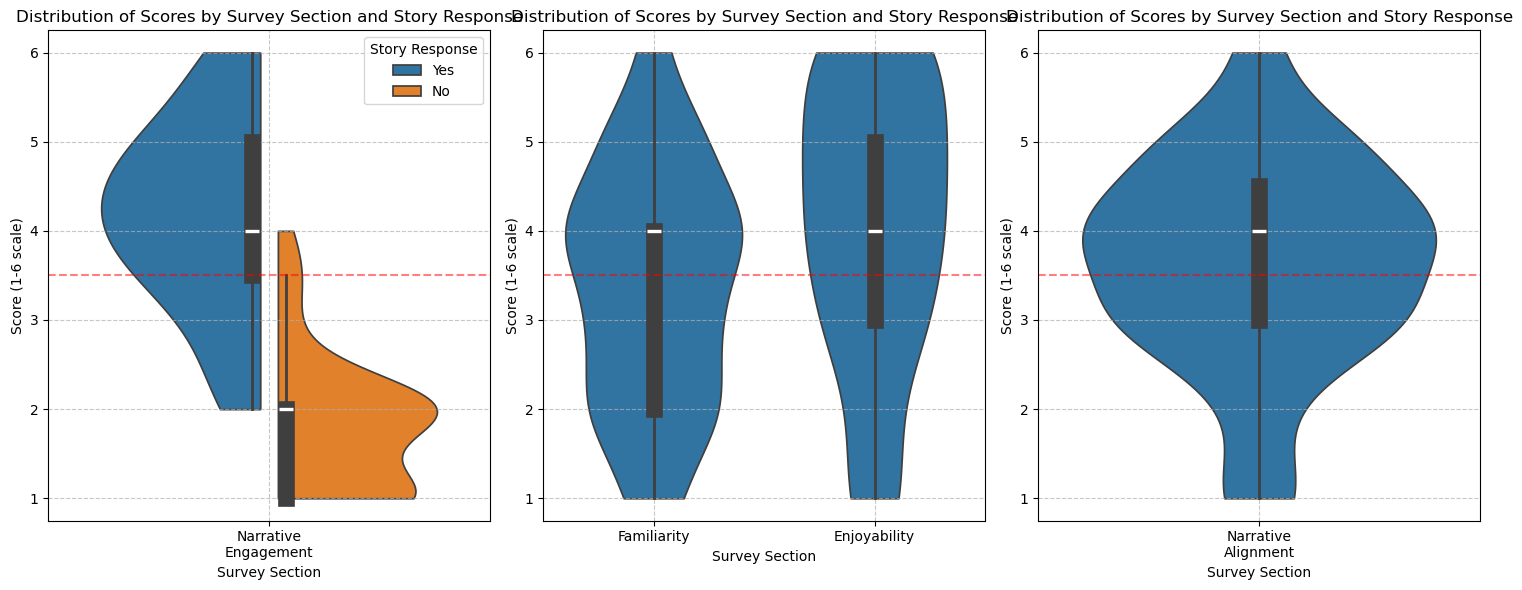

In [ ]:
def create_combined_visualization(df):
    # Prepare data for plotting with SRQ information
    categories_1 = {
        'Narrative\nEngagement': narrative_engagement_cols
    }
    categories_2 = {
        'Familiarity': ['familiarity_score'],
        'Enjoyability': ['enjoyability_score'],
    }

    categories_3 = {
        'Narrative\nAlignment': narrative_alignment_cols
    }
    
    plot_data_1 = pd.DataFrame()
    for category_name, cols in categories_1.items():
        category_scores = df[cols].median(axis=1)
        temp_df = pd.DataFrame({
            'Survey Section': category_name,
            'Score': category_scores,
            'Story Response': df['srq']
        })
        plot_data_1 = pd.concat([plot_data_1, temp_df])

    plot_data_2 = pd.DataFrame()
    for category_name, cols in categories_2.items():
        category_scores = df[cols].median(axis=1)
        temp_df = pd.DataFrame({
            'Survey Section': category_name,
            'Score': category_scores
        })
        plot_data_2 = pd.concat([plot_data_2, temp_df])

    plot_data_3 = pd.DataFrame()
    for category_name, cols in categories_3.items():
        category_scores = df[cols].median(axis=1)
        temp_df = pd.DataFrame({
            'Survey Section': category_name,
            'Score': category_scores
        })
        plot_data_3 = pd.concat([plot_data_3, temp_df])
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))
    
    inner = dict(box_width=12, whis_width=2)
    sns.violinplot(data=plot_data_1, x='Survey Section', y='Score', 
                  hue='Story Response', split=True, gap=0.1, inner_kws=inner, cut=0, ax=ax1)
    
    ax1.set_title('Distribution of Scores by Survey Section and Story Response')
    ax1.set_ylabel('Score (1-6 scale)')
    ax1.grid(True, linestyle='--', alpha=0.7)

    sns.violinplot(data=plot_data_2, x='Survey Section', y='Score', inner_kws=inner, cut=0, ax=ax2)
    ax2.set_title('Distribution of Scores by Survey Section and Story Response')
    ax2.set_ylabel('Score (1-6 scale)')
    ax2.grid(True, linestyle='--', alpha=0.7)

    sns.violinplot(data=plot_data_3, x='Survey Section', y='Score', inner_kws=inner, cut=0, ax=ax3)
    ax3.set_title('Distribution of Scores by Survey Section and Story Response')
    ax3.set_ylabel('Score (1-6 scale)')
    ax3.grid(True, linestyle='--', alpha=0.7)
    
    ax1.axhline(y=3.5, color='r', linestyle='--', alpha=0.5)
    ax2.axhline(y=3.5, color='r', linestyle='--', alpha=0.5)
    ax3.axhline(y=3.5, color='r', linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    
    plt.show()

create_combined_visualization(df)

In [39]:
def create_separate_visualizations(df):
    inner = dict(box_width=10, whis_width=4)
    
    # Plot 1: Narrative Engagement
    plt.figure(figsize=(4, 4))
    categories_1 = {'Narrative\nEngagement': narrative_engagement_cols}
    plot_data_1 = pd.DataFrame()
    for category_name, cols in categories_1.items():
        category_scores = df[cols].median(axis=1)
        temp_df = pd.DataFrame({
            'Category': category_name, 
            'Score': category_scores,
            'Did you imagine\na story?': df['srq']
        })
        plot_data_1 = pd.concat([plot_data_1, temp_df])
    
    ax1 = sns.violinplot(data=plot_data_1, x='Category', y='Score', 
                        hue='Did you imagine\na story?', split=True, gap=0.1, 
                        inner='box', inner_kws=inner, cut=0)
    ax1.axhline(y=3.5, color='r', linestyle='--', alpha=0.5)
    ax1.set_xlabel('') 
    ax1.set_title('')  
    ax1.set_ylabel('Score (1-6 scale)')
    ax1.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('narrative_engagement.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # Plot 2: Familiarity and Enjoyability
    plt.figure(figsize=(4, 4))
    categories_2 = {
        'Familiarity': ['familiarity_score'],
        'Enjoyability': ['enjoyability_score']
    }
    plot_data_2 = pd.DataFrame()
    for category_name, cols in categories_2.items():
        category_scores = df[cols].median(axis=1)
        temp_df = pd.DataFrame({
            'Category': category_name,
            'Score': category_scores
        })
        plot_data_2 = pd.concat([plot_data_2, temp_df])
    
    ax2 = sns.violinplot(data=plot_data_2, x='Category', y='Score', 
                        inner='box', inner_kws=inner, cut=0)
    ax2.axhline(y=3.5, color='r', linestyle='--', alpha=0.5)
    ax2.set_xlabel('')
    ax2.set_title('')
    ax2.set_ylabel('Score (1-6 scale)')
    ax2.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('familiarity_enjoyability.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # Plot 3: Narrative Alignment
    plt.figure(figsize=(4, 4))
    categories_3 = {'Narrative\nAlignment': narrative_alignment_cols}
    plot_data_3 = pd.DataFrame()
    for category_name, cols in categories_3.items():
        category_scores = df[cols].median(axis=1)
        temp_df = pd.DataFrame({
            'Category': category_name,
            'Score': category_scores
        })
        plot_data_3 = pd.concat([plot_data_3, temp_df])
    
    ax3 = sns.violinplot(data=plot_data_3, x='Category', y='Score', 
                        inner='box', inner_kws=inner, cut=0)
    ax3.axhline(y=3.5, color='r', linestyle='--', alpha=0.5)
    ax3.set_xlabel('')
    ax3.set_title('')
    ax3.set_ylabel('Score (1-6 scale)')
    ax3.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('narrative_alignment.png', dpi=300, bbox_inches='tight')
    plt.close()

create_separate_visualizations(df)

In [68]:
from matplotlib.patches import Patch
plt.rcParams['font.family'] = 'Times New Roman'

def create_combined_visualization(df):
    inner = dict(box_width=10, whis_width=4, color='#3d3d3d')
    both_patch = Patch(facecolor='#d5ab7c', edgecolor='black', linewidth=1,label='Both')

    plt.figure(figsize=(10, 4))
    
    plot_data = pd.DataFrame()
    
    # Narrative Engagement with individual scores
    for idx in df.index:
        temp_df = pd.DataFrame({
            'Category': 'Narrative\nEngagement',
            'Score': df[narrative_engagement_cols].loc[idx].median(),
            'Did you imagine\na story?': df.loc[idx, 'srq']
        }, index=[idx])
        plot_data = pd.concat([plot_data, temp_df])
    
    # Familiarity and Enjoyability
    for category in ['Familiarity', 'Enjoyability']:
        for idx in df.index:
            temp_df = pd.DataFrame({
                'Category': category,
                'Score': df.loc[idx, f'{category.lower()}_score']
            }, index=[idx])
            plot_data = pd.concat([plot_data, temp_df])
    
    # Narrative Alignment
    for idx in df.index:
        temp_df = pd.DataFrame({
            'Category': 'Narrative\nAlignment',
            'Score': df[narrative_alignment_cols].loc[idx].median()
        }, index=[idx])
        plot_data = pd.concat([plot_data, temp_df])
    
    ax = plt.gca()
    # Split data for different plot types
    engagement_data = plot_data[plot_data['Category'] == 'Narrative\nEngagement']
    other_data = plot_data[plot_data['Category'] != 'Narrative\nEngagement']
    
    # Plot violins
    sns.violinplot(data=engagement_data, x='Category', y='Score',
                  hue='Did you imagine\na story?', split=True,
                  inner='box', inner_kws=inner, cut=0,
                  palette={
                        'Yes': '#d66a05',
                        'No': '#d3ecf2'
                  },
                  ax=ax)
    
    sns.violinplot(data=other_data, x='Category', y='Score',
                  hue='Category', legend=False, 
                  palette={
                      'Familiarity': '#d5ab7c',
                      'Enjoyability': '#d5ab7c',
                      'Narrative\nAlignment': '#d5ab7c'
                  },
                  inner='box', inner_kws=inner, cut=0,
                  ax=ax)
    
    # Styling
    # ax.axhline(y=3.5, color='r', linestyle='--', alpha=0.5)
    ax.set_xlabel('')
    ax.set_title('')
    ax.set_ylabel('Score (1-6 scale)', fontsize=16)

    ax.tick_params(axis='both', labelsize=10)
    plt.setp(ax.get_xticklabels(), fontsize=16)
    plt.setp(ax.get_yticklabels(), fontsize=16)

    ax.grid(True, linestyle='--', alpha=0.7)

    handles, labels = ax.get_legend_handles_labels()
    handles = handles[:2] + [both_patch] 
    ax.legend(handles, ['Yes', 'No', 'Combined'],
             title='Did you imagine\na story?',
             loc='upper left',
             bbox_to_anchor=(0.125, 1),
             fontsize=12, 
             title_fontsize=12)
    
    
    plt.tight_layout()
    plt.savefig('combined_analysis.png', dpi=300, bbox_inches='tight')
    plt.close()

In [69]:
create_combined_visualization(df)